In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import torch

In [2]:
torch.cuda.is_available()

True

In [3]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if DEVICE.type == 'cuda':
    torch.set_default_tensor_type('torch.cuda.FloatTensor')
print(DEVICE.type)

cuda


In [4]:
X, y = make_regression(n_samples=100, n_features=100, noise=0.1)

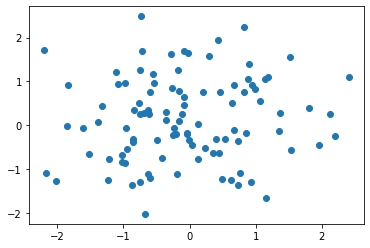

In [5]:
plt.scatter(X[:, 0], X[:, 1])

In [6]:
class LinearRegression():
    def __init__(self, lr, epochs, verbose):
        self.lr = lr
        self.epochs = epochs
        self.verbose = verbose
        return
    
    def __model(self):
        return self.X @ self.W.t() + self.b
    
    def mse(self, y, y_pred):
        diff = y - y_pred
        return torch.sum(diff * diff) / y.numel()
        
    def fit(self, X, y):
        self.X = torch.from_numpy(X).to(DEVICE)
        self.y = torch.from_numpy(y).to(DEVICE)
        self.W = torch.randn(X.shape[1], dtype=torch.double, requires_grad=True).to(DEVICE)
        self.b = torch.randn(1, dtype=torch.double, requires_grad=True).to(DEVICE)
        self.losses = []
        
        for epoch in range(self.epochs):
            preds = self.__model()
            loss = self.mse(self.y, preds)
            self.losses.append(loss.item())
            loss.backward()
            
            with torch.no_grad():
                self.W-=(self.W.grad*self.lr)
                self.b-=(self.b.grad*self.lr)
                self.W.grad.zero_()
                self.b.grad.zero_()
            if (epoch==0) or (epoch%self.verbose==0) or (epoch==self.epochs-1):
                print(f'Epoch: {epoch}. MSE - {loss.item():.2f}')
    
    def predict(self, X):
        return X @ self.W.t() + self.b

In [17]:
linreg = LinearRegression(lr=1e-3, epochs = 10000, verbose=500)
linreg.fit(X, y)

Epoch: 0. MSE - 41158.13
Epoch: 500. MSE - 2658.47
Epoch: 1000. MSE - 851.63
Epoch: 1500. MSE - 445.13
Epoch: 2000. MSE - 282.49
Epoch: 2500. MSE - 201.90
Epoch: 3000. MSE - 156.26
Epoch: 3500. MSE - 127.50
Epoch: 4000. MSE - 107.72
Epoch: 4500. MSE - 93.19
Epoch: 5000. MSE - 81.96
Epoch: 5500. MSE - 72.97
Epoch: 6000. MSE - 65.60
Epoch: 6500. MSE - 59.45
Epoch: 7000. MSE - 54.23
Epoch: 7500. MSE - 49.78
Epoch: 8000. MSE - 45.94
Epoch: 8500. MSE - 42.60
Epoch: 9000. MSE - 39.69
Epoch: 9500. MSE - 37.14
Epoch: 9999. MSE - 34.89


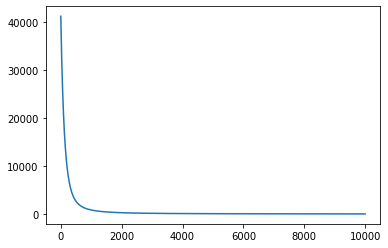

In [18]:
plt.plot(linreg.losses)